Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        25

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



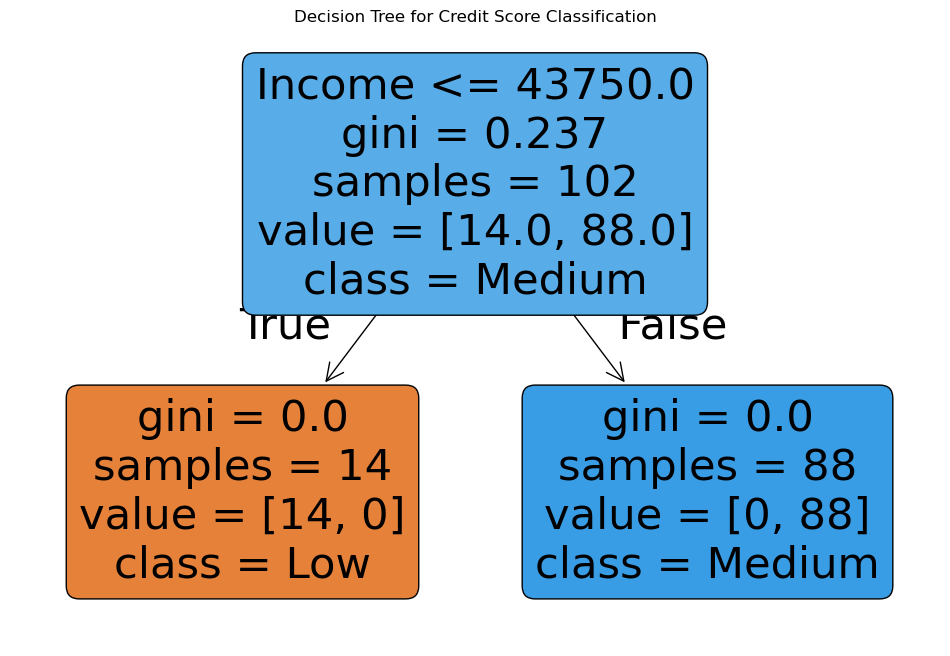

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load dataset
file_path = "Credit Score Classification Dataset.csv"
df = pd.read_csv(r'Downloads\Credit Score Classification Dataset.csv')

# Map Credit Score categories to numeric values
credit_score_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Credit Score'] = df['Credit Score'].map(credit_score_mapping)

# Drop NaN values from 'Credit Score'
df = df.dropna(subset=['Credit Score'])

# Convert 'Credit Score' to integer type
df['Credit Score'] = df['Credit Score'].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Gender', 'Education', 'Marital Status', 'Home Ownership'], drop_first=True)

# Split dataset into features (X) and target (y)
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Low", "Medium", "High"], rounded=True)
plt.title("Decision Tree for Credit Score Classification")
plt.show()